In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
from matplotlib import pyplot as plt
import re
import bs4
from plotly.graph_objs import Figure, Histogram, Layout

In [2]:
df = pd.read_csv('ccfraud train (1.19 - 3.20).csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [21]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [25]:
df = df[['trans_date_trans_time', 'merchant', 'category', 'amt', 'city_pop', \
         'job', 'dob', 'gender', 'city', 'state', 'zip', 'is_fraud']]

In [34]:
df['year'] = df['trans_date_trans_time'].str.split('-').str[0]
df['month'] = df['trans_date_trans_time'].str.split('-').str[1]
df['day'] = df['trans_date_trans_time'].str.split('-').str[2]

In [38]:
df = df.drop('trans_date_trans_time', axis=1)

In [51]:
df

,merchant,category,amt,city_pop,job,dob,gender,city,state,zip,is_fraud,year,month,day
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,3495,"Psychologist, counselling",1988-03-09,F,Moravian Falls,NC,28654,0,2019,01,01 00:00:18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,149,Special educational needs teacher,1978-06-21,F,Orient,WA,99160,0,2019,01,01 00:00:44
2,fraud_Lind-Buckridge,entertainment,220.11,4154,Nature conservation officer,1962-01-19,M,Malad City,ID,83252,0,2019,01,01 00:00:51
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,1939,Patent attorney,1967-01-12,M,Boulder,MT,59632,0,2019,01,01 00:01:16
4,fraud_Keeling-Crist,misc_pos,41.96,99,Dance movement psychotherapist,1986-03-28,M,Doe Hill,VA,24433,0,2019,01,01 00:03:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,258,Geoscientist,1961-11-24,M,Hatch,UT,84735,0,2020,06,21 12:12:08
1296671,fraud_Abernathy and Sons,food_dining,51.70,100,"Production assistant, television",1979-12-11,M,Tuscarora,MD,21790,0,2020,06,21 12:12:19
1296672,fraud_Stiedemann Ltd,food_dining,105.93,899,Naval architect,1967-08-30,M,High Rolls Mountain Park,NM,88325,0,2020,06,21 12:12:32
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,1126,Volunteer coordinator,1980-08-18,M,Manderson,SD,57756,0,2020,06,21 12:13:36


In [53]:
df.groupby('category').agg({'amt': 'mean'})

,amt
category,
entertainment,64.210421
food_dining,51.086905
gas_transport,63.434572
grocery_net,53.670084
grocery_pos,116.960986
health_fitness,54.182140
home,58.270139
kids_pets,57.536871
misc_net,80.865095


In [58]:
df['zip'].value_counts().head(50)

73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
15484    3123
85173    3119
29819    3117
38761    3113
5461     3112
44233    3110
4287     3107
72042    3106
16858    3105
28405    3101
26292    3099
12419    3095
80120    3090
6024     3090
98238    3088
64019    3087
36749    3083
66018    3082
72011    3081
7060     3080
21872    3077
49895    3074
59448    3074
72476    3072
76578    3071
70808    3064
69165    3061
58569    3056
12986    3055
48438    3054
52535    3051
39073    3046
65072    3045
84540    3040
76050    3039
71960    3039
78584    3038
91321    3034
46254    3032
99160    3030
33872    3027
49854    3027
19149    3026
92585    3026
85020    3023
Name: zip, dtype: int64

In [3]:
df_notfraud = df[df['is_fraud'] == 0]
df_fraud = df[df['is_fraud'] == 1]

In [4]:
df_fraud['gender'].value_counts() / df_notfraud['gender'].value_counts()

F    0.005289
M    0.006468
Name: gender, dtype: float64

In [5]:
df_fraud.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df_fraud['category'].value_counts()

grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: category, dtype: int64

In [7]:
df_notfraud['category'].value_counts()

gas_transport     131041
home              122917
grocery_pos       121895
shopping_pos      115829
kids_pets         112796
shopping_net       95830
entertainment      93781
food_dining        91310
personal_care      90538
health_fitness     85746
misc_pos           79405
misc_net           62372
grocery_net        45318
travel             40391
Name: category, dtype: int64

<AxesSubplot:>

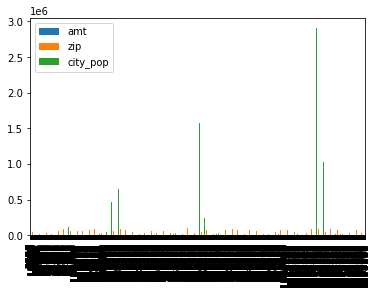

In [36]:
df_fraud = df_fraud[['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender', \
                     'city', 'state', 'zip', 'city_pop', 'job', 'dob']]

df_fraud.plot.bar()

In [70]:
coffee['year'] = coffee['Date'].str.split('-').str[0]

<AxesSubplot:xlabel='year'>

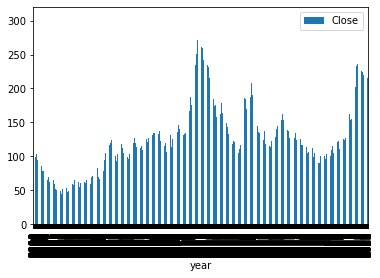

In [75]:
coffee.plot.bar('year','Close')

In [64]:
gas = pd.read_csv('gas prices daily (1.97 - 9.20).csv')
gas.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


<AxesSubplot:xlabel='Date', ylabel='Price'>

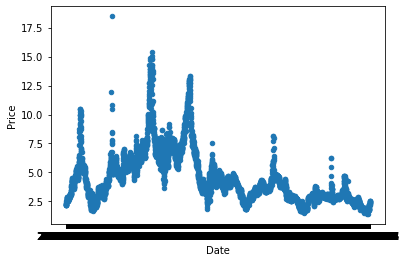

In [66]:
coffee.merge(gas, on='Date').plot.scatter('Date', 'Price') #gas

<AxesSubplot:xlabel='Date', ylabel='Close'>

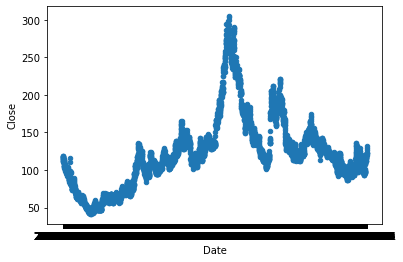

In [67]:
coffee.merge(gas, on='Date').plot.scatter('Date', 'Close') #gas

<AxesSubplot:xlabel='year', ylabel='is_fraud'>

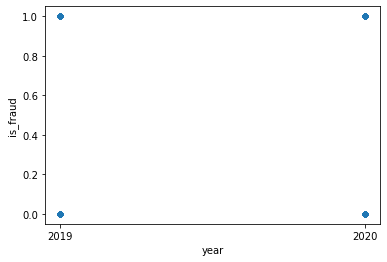

In [68]:
df.plot.scatter('year', 'is_fraud')

In [86]:
gas[gas['Date'] == '2014-03-03']

,Date,Price
4293,2014-03-03,7.09


In [111]:
gas = pd.read_csv('Weekly_California_Regular_All_Formulations_Retail_Gasoline_Prices.csv', parse_dates = ['Date'])
gas.tail()

,Date,Price
1165,2000-06-19,1.618
1166,2000-06-12,1.614
1167,2000-06-05,1.613
1168,2000-05-29,1.626
1169,2000-05-22,1.634


<AxesSubplot:xlabel='Date', ylabel='Price'>

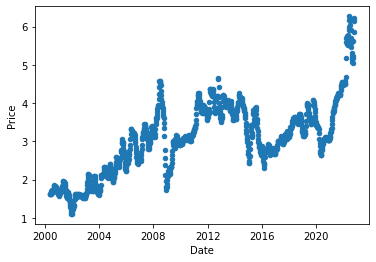

In [110]:
gas.sort_values('Date').plot.scatter('Date', 'Price')

In [137]:
gas_df = pd.read_csv('gas_prices (5.00 - 9.22).csv', parse_dates = ['Date'])
gas_df.rename(columns={'Price': 'Gas Price'}, inplace=True)
gas_df

,Date,Gas Price
0,2022-10-17,5.847
1,2022-10-10,6.156
2,2022-10-03,6.213
3,2022-09-26,5.615
4,2022-09-19,5.239
...,...,...
1165,2000-06-19,1.618
1166,2000-06-12,1.614
1167,2000-06-05,1.613
1168,2000-05-29,1.626


In [154]:
cc_df = pd.read_csv('ccfraud train (1.19 - 3.20).csv', parse_dates = ['trans_date_trans_time'])
cc_df['Date'] = pd.to_datetime(df['trans_date_trans_time'].dt.date)
cc_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Date
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,2020-06-21
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,2020-06-21
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,2020-06-21
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,2020-06-21


In [160]:
cc_df[(cc_df['is_fraud'] == 1) & (cc_df['state'] == 'CA')].merge(gas_df, on='Date', how='inner')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Date,Gas Price
0,21732,2019-01-14 00:27:32,3536918668124647,fraud_Rau and Sons,grocery_pos,306.81,Michelle,Juarez,F,44864 Melton Vista Suite 310,...,973849,Science writer,1955-06-12,fdc202f9f1dd556a51775c6d8060c58d,1326500852,36.502259,-122.323669,1,2019-01-14,3.161
1,21742,2019-01-14 00:37:01,3536918668124647,fraud_Parisian and Sons,gas_transport,12.57,Michelle,Juarez,F,44864 Melton Vista Suite 310,...,973849,Science writer,1955-06-12,dec7f564c518a3f5878016461d766ffa,1326501421,36.860137,-122.217748,1,2019-01-14,3.161
2,21835,2019-01-14 01:42:55,3536918668124647,"fraud_Schumm, Bauch and Ondricka",grocery_pos,277.53,Michelle,Juarez,F,44864 Melton Vista Suite 310,...,973849,Science writer,1955-06-12,9f720ebc9d1f437c787a4d80479c67fa,1326505375,36.598750,-121.383937,1,2019-01-14,3.161
3,22467,2019-01-14 09:30:36,3536918668124647,"fraud_Jenkins, Hauck and Friesen",gas_transport,8.25,Michelle,Juarez,F,44864 Melton Vista Suite 310,...,973849,Science writer,1955-06-12,b559d49e830a7573530e9cc4c82d5424,1326533436,37.259809,-121.898420,1,2019-01-14,3.161
4,23962,2019-01-14 22:28:37,3536918668124647,fraud_Beier-Hyatt,shopping_pos,969.64,Michelle,Juarez,F,44864 Melton Vista Suite 310,...,973849,Science writer,1955-06-12,163aa0609a5b81e3b3be72fb7bc31ed3,1326580117,36.709536,-122.649175,1,2019-01-14,3.161
5,45476,2019-01-28 00:07:20,676234256292,fraud_DuBuque LLC,grocery_pos,296.87,David,Vasquez,M,06539 Gregory Mountains Suite 029,...,126,Marketing executive,1992-10-07,67a4368c92088255cd2dac11bfba9b5e,1327709240,33.352471,-113.515467,1,2019-01-28,3.130
6,45605,2019-01-28 01:51:12,676234256292,fraud_Hackett-Lueilwitz,grocery_pos,294.02,David,Vasquez,M,06539 Gregory Mountains Suite 029,...,126,Marketing executive,1992-10-07,ed8af8dc93343a3f6003f143e687d8a5,1327715472,33.868431,-114.495419,1,2019-01-28,3.130
7,45646,2019-01-28 02:16:33,373213026644490,fraud_Kilback LLC,grocery_pos,295.07,Bobby,Smith,M,3495 Williams Stream,...,1241364,Comptroller,1987-11-30,a0d5021e69f03868e1aec0600bc83667,1327716993,32.136058,-118.113176,1,2019-01-28,3.130
8,45738,2019-01-28 03:29:31,676234256292,fraud_Koepp-Parker,grocery_pos,321.49,David,Vasquez,M,06539 Gregory Mountains Suite 029,...,126,Marketing executive,1992-10-07,8524e211e3f48239ab8d30300c8d4744,1327721371,35.181692,-115.067423,1,2019-01-28,3.130
9,45769,2019-01-28 03:53:39,373213026644490,fraud_Kiehn Inc,grocery_pos,276.99,Bobby,Smith,M,3495 Williams Stream,...,1241364,Comptroller,1987-11-30,1acc037be737eab0f99686286dce3777,1327722819,32.602272,-117.826092,1,2019-01-28,3.130


In [158]:
cc_df.merge(gas_df, on='Date', how='inner')['state'].value_counts()

TX    18729
NY    16361
PA    15523
CA    11241
OH     9168
MI     8886
IL     8426
FL     8333
AL     7887
MO     7394
MN     6197
AR     6157
NC     5948
WI     5845
VA     5649
SC     5643
KY     5587
IN     5452
GA     5299
OK     5245
IA     5192
MD     5050
WV     4989
NJ     4870
NE     4738
KS     4524
MS     4312
LA     4176
OR     3689
WY     3684
WA     3665
ME     3362
TN     3290
NM     3255
ND     2901
CO     2801
MA     2409
VT     2384
SD     2379
MT     2261
AZ     2205
UT     2036
NH     1665
CT     1439
NV     1177
ID     1092
DC      756
HI      466
AK      411
RI      131
DE        3
Name: state, dtype: int64

In [172]:
commodity_df = pd.read_csv('commodity 2000-2022.csv', parse_dates = ['Date'])
commodity_df[]

,Symbol,Date,Open,High,Low,Close,Volume
0,Gold,2000-01-04,281.00,281.00,281.00,282.70,4
1,Gold,2000-01-05,283.20,283.20,283.20,281.10,16
2,Gold,2000-01-06,281.40,281.40,281.40,281.40,0
3,Gold,2000-01-07,281.90,281.90,281.90,281.90,0
4,Gold,2000-01-10,281.70,281.70,281.70,281.70,0
...,...,...,...,...,...,...,...
29930,US Wheat,2022-04-04,989.50,1014.50,984.75,1010.25,0
29931,US Wheat,2022-04-05,1020.50,1074.00,1020.00,1045.25,0
29932,US Wheat,2022-04-06,1049.40,1056.40,1024.25,1041.12,0
29933,US Wheat,2022-04-07,1040.25,1044.50,1017.75,1020.00,0


/Users/setone/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


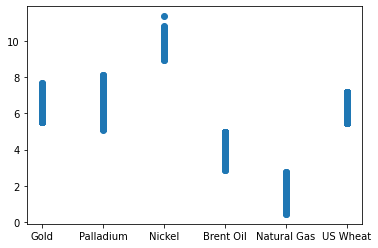

In [182]:
plt.scatter(commodity_df['Symbol'], np.log(commodity_df['High']))

/Users/setone/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<BarContainer object of 29935 artists>

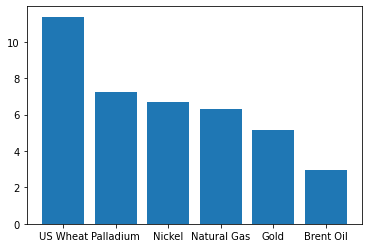

In [186]:
plt.bar(commodity_df['Symbol'].sort_values(ascending=False), \
        np.log(commodity_df['High'].sort_values(ascending=False)))

/Users/setone/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


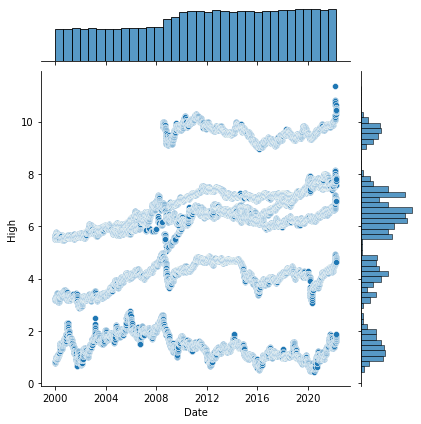

In [193]:
sns.jointplot(commodity_df['Date'], np.log(commodity_df['High']))

In [206]:
commodity_df['log avg'] = np.log(commodity_df['High'])
commodity_df

/Users/setone/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



,Symbol,Date,Open,High,Low,Close,Volume,log avg
0,Gold,2000-01-04,281.00,281.00,281.00,282.70,4,5.638355
1,Gold,2000-01-05,283.20,283.20,283.20,281.10,16,5.646153
2,Gold,2000-01-06,281.40,281.40,281.40,281.40,0,5.639777
3,Gold,2000-01-07,281.90,281.90,281.90,281.90,0,5.641552
4,Gold,2000-01-10,281.70,281.70,281.70,281.70,0,5.640843
...,...,...,...,...,...,...,...,...
29930,US Wheat,2022-04-04,989.50,1014.50,984.75,1010.25,0,6.922151
29931,US Wheat,2022-04-05,1020.50,1074.00,1020.00,1045.25,0,6.979145
29932,US Wheat,2022-04-06,1049.40,1056.40,1024.25,1041.12,0,6.962622
29933,US Wheat,2022-04-07,1040.25,1044.50,1017.75,1020.00,0,6.951294


In [208]:
merge = cc_df[(cc_df['is_fraud'] == 1) & (cc_df['state'] == 'CA')].merge(commodity_df, on='Date', how='inner')

In [209]:
merge

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,is_fraud,Date,Symbol,Open,High,Low,Close,Volume,log avg
0,21422,2019-01-13 21:10:28,3536918668124647,fraud_Terry-Huel,shopping_net,994.92,Michelle,Juarez,F,44864 Melton Vista Suite 310,...,-122.148270,1,2019-01-13,Palladium,1280.900,1280.900,1274.100,1276.450,0,7.155318
1,21588,2019-01-13 23:04:16,3536918668124647,"fraud_Tillman, Fritsch and Schmitt",misc_net,816.89,Michelle,Juarez,F,44864 Melton Vista Suite 310,...,-122.469759,1,2019-01-13,Palladium,1280.900,1280.900,1274.100,1276.450,0,7.155318
2,21630,2019-01-13 23:28:38,3536918668124647,fraud_Kutch and Sons,grocery_pos,307.50,Michelle,Juarez,F,44864 Melton Vista Suite 310,...,-122.356511,1,2019-01-13,Palladium,1280.900,1280.900,1274.100,1276.450,0,7.155318
3,21668,2019-01-13 23:45:34,3536918668124647,"fraud_Parisian, Schiller and Altenwerth",misc_net,790.35,Michelle,Juarez,F,44864 Melton Vista Suite 310,...,-121.371988,1,2019-01-13,Palladium,1280.900,1280.900,1274.100,1276.450,0,7.155318
4,21732,2019-01-14 00:27:32,3536918668124647,fraud_Rau and Sons,grocery_pos,306.81,Michelle,Juarez,F,44864 Melton Vista Suite 310,...,-122.323669,1,2019-01-14,Gold,1357.200,1357.200,1357.200,1357.200,395,7.213179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,1253167,2020-06-05 23:33:07,4440581794652,"fraud_Lakin, Ferry and Beatty",food_dining,114.36,Karen,Cooper,F,425 Caleb Point Apt. 050,...,-116.296495,1,2020-06-05,Palladium,1940.400,1994.050,1916.400,1966.000,0,7.597923
1503,1253167,2020-06-05 23:33:07,4440581794652,"fraud_Lakin, Ferry and Beatty",food_dining,114.36,Karen,Cooper,F,425 Caleb Point Apt. 050,...,-116.296495,1,2020-06-05,Nickel,12777.500,13012.500,12745.000,12991.000,71432,9.473666
1504,1253167,2020-06-05 23:33:07,4440581794652,"fraud_Lakin, Ferry and Beatty",food_dining,114.36,Karen,Cooper,F,425 Caleb Point Apt. 050,...,-116.296495,1,2020-06-05,Brent Oil,39.840,42.480,39.720,42.300,250309,3.749033
1505,1253167,2020-06-05 23:33:07,4440581794652,"fraud_Lakin, Ferry and Beatty",food_dining,114.36,Karen,Cooper,F,425 Caleb Point Apt. 050,...,-116.296495,1,2020-06-05,Natural Gas,1.821,1.864,1.777,1.782,207229,0.622725


In [227]:
cc_df[cc_df['is_fraud'] == 1].groupby('category')['dob'].plot.bar('dob', 'amt')

TypeError: no numeric data to plot

In [225]:
cc_df

,dob
0,1988-03-09
1,1978-06-21
2,1962-01-19
3,1967-01-12
4,1986-03-28
...,...
1296670,1961-11-24
1296671,1979-12-11
1296672,1967-08-30
1296673,1980-08-18
